In [1]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import matplotlib.pyplot as pt
import numpy as np
import threading

links = []   #將內文頁的連結都存在links裡
Host="https://www.1111.com.tw" 
H='https:'
wc=Counter() #先建字典，放在最外面給大家都能使用
wc['C++']=0
wc['C']=0
wc['JAVA']=0
wc['JAVASCRIPT']=0
wc['C#']=0
wc['PYTHON']=0
wc['PHP']=0
wc['HTML']=0
wc['SQL']=0
wc['CSS']=0
wc['R']=0
wc['BASH']=0
wc['RUBY']=0
wc['PERL']=0
wc['SCALA']=0
wc['SWIFT']=0
wc['GO']=0
wc['DELPHI']=0
wc['TYPESCRIPT']=0

In [2]:
def pageChange(page): #換頁爬蟲，page要給頁數
    pages=Host+'/job-bank/job-index.asp?si=1&ss=s&d0=140200,140100,140300,140400&page='+str(page)
    res=requests.get(pages)  
    soup=BeautifulSoup(res.text,'lxml')  #將每一頁轉成soup
    buttons=soup.select('div.jbInfoin > h3 > a') #再從soup的原始碼內找出各內文頁的連結
    for i in buttons:
        links.append(i['href']) #將各內文頁的網址存入links

In [3]:
def extract(link):
    sk=requests.get(H+link)  #將各內文頁的網址加上'https:'使其完整
    BS=BeautifulSoup(sk.text,'lxml') 
    data=BS.find('div',{'id':"midblock"})
    words=data.find_all('dd')#抓出專長頁&工作內容也有可能出現語言的需求
    p=re.compile('[A-Z]+[+#]*')
    cols=p.findall(str(words).upper())   #(R) str(words) cheng type  then can useing  .upper()
    W=[]
    for w in cols:  #比對出現在頁面中的英文是否出現過 （刪除重複）
        if w not in W:
             W.append(w)
        
    for word in W: #如果有出現在字典中 丟到wc做計算
        if word in wc:
            wc[word]+=1

In [4]:
class textThread (threading.Thread):  #建立內文爬蟲的執行緒
    def __init__(self,link): #定義建構子（self為必要(= JAVA裡的this),後面接要輸入的參數）
        threading.Thread.__init__(self)
        self.link=link
    def run(self): #等同於java執行緒中的run 把它overwrite 
        extract(self.link)  #將內文頁的link傳入並呼叫extract方法來找各熱門語言

In [5]:
class pageThread (threading.Thread): #建立多執行緒類別(內文用)
    def __init__(self,page): #定義建構子（self為必要(= JAVA裡的this),後面接要輸入的參數）
        threading.Thread.__init__(self) #繼承父類別（照著打就好）
        self.page=page #this.page=page
    def run(self): #改寫run方法
        pageChange(self.page) #將要爬的頁數丟給pageChange去執行

In [6]:
threadpage=[] #（換頁）所有執行緒存放的陣列
for page in range(1,5):  #看要給幾頁
    Thread=pageThread(page)
    threadpage.append(Thread)    
for i in threadpage:
    i.start() #執行緒開始
for i in threadpage:
    i.join()  #全部執行緒結束後主執行緒才會繼續（確保所有執行緒都跑完）

threadwords=[] #（爬內文）所有執行緒存放的陣列
for link in links:
    threadword=textThread(link) 
    threadwords.append(threadword)
for j in threadwords:
    j.start() #執行緒開始
    #time.sleep(0.02)
for j in threadwords:
    j.join() #全部執行緒結束後主執行緒才會繼續（確保所有執行緒都跑完）

In [8]:
print('共爬了'+str(len(links))+'頁內文頁')
wc.most_common()

共爬了90頁內文頁


[('PHP', 43),
 ('SQL', 23),
 ('JAVA', 18),
 ('C#', 14),
 ('HTML', 11),
 ('C', 10),
 ('C++', 8),
 ('JAVASCRIPT', 8),
 ('CSS', 8),
 ('PYTHON', 5),
 ('R', 1),
 ('BASH', 1),
 ('SWIFT', 1),
 ('DELPHI', 1),
 ('RUBY', 0),
 ('PERL', 0),
 ('SCALA', 0),
 ('GO', 0),
 ('TYPESCRIPT', 0)]

In [9]:
leng = []  # 取出每個key
for i in wc.keys():
    leng.append(i)
print(leng)

['C++', 'C', 'JAVA', 'JAVASCRIPT', 'C#', 'PYTHON', 'PHP', 'HTML', 'SQL', 'CSS', 'R', 'BASH', 'RUBY', 'PERL', 'SCALA', 'SWIFT', 'GO', 'DELPHI', 'TYPESCRIPT']


In [10]:
count = []  # 取出每個 value 
for i in wc.values():
    count.append(i)
print(count)

[23, 46, 421, 163, 111, 45, 450, 204, 224, 90, 21, 0, 0, 0, 0, 157, 0, 0, 0]


['C++', 'C', 'JAVA', 'JAVASCRIPT', 'C#', 'PYTHON', 'PHP', 'HTML', 'SQL', 'CSS', 'R', 'BASH', 'RUBY', 'PERL', 'SCALA', 'SWIFT', 'GO', 'DELPHI', 'TYPESCRIPT', 'C++', 'C', 'JAVA', 'JAVASCRIPT', 'C#', 'PYTHON', 'PHP', 'HTML', 'SQL', 'CSS', 'R', 'BASH', 'RUBY', 'PERL', 'SCALA', 'SWIFT', 'GO', 'DELPHI', 'TYPESCRIPT']


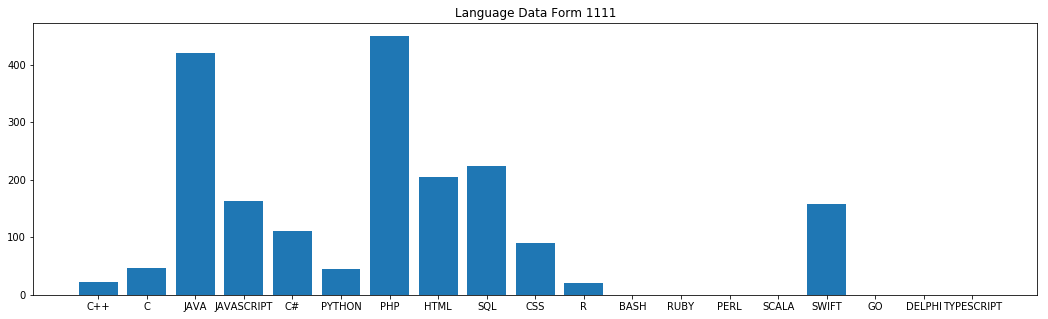

In [11]:
language=np.arange(len(leng)) #利用arange產生leng的索引值
for i in wc.keys():
    leng.append(i)
print(leng)
pt.figure(figsize=(18,5)) #設定x,y軸寬度
pt.bar(language, count)
pt.xticks(language, leng)
#pt.xticks(rotation=90)
#pt.plot(language, count, linewidth=1)
#pt.ylim(0,800)
pt.title('Language Data Form 1111')
pt.show()